<a href="https://colab.research.google.com/github/Kelvyh/ML2023-KelvyHallyson/blob/main/Lista%2002%20-%20fmnist/knn_fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

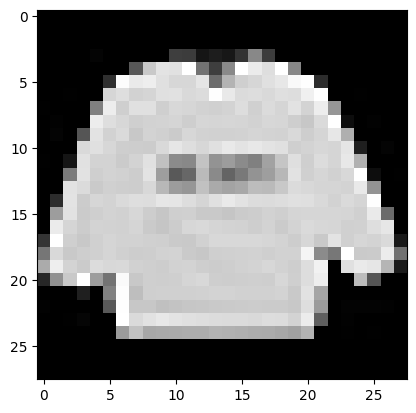

In [6]:
# Imprimindo um objeto do dataset
plt.imshow(data.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

Pegando os dados de treino e teste.

In [8]:
train = np.array(pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv'))
test = np.array(pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv'))

Criando dados de validação apartir dos dados de teste.

In [9]:
train_labels = np.ravel(train[:, 0:1])
test_labels =  np.ravel(test[:, 0:1])

In [10]:
(testData, valData, testLabels, valLabels) = train_test_split(test, test_labels,
test_size=0.1, random_state=84)

In [11]:
print("training data points: {}".format(len(train_labels)))
print("testing data points: {}".format(len(testLabels)))
print("validating data points: {}".format(len(valLabels)))

training data points: 60000
testing data points: 9000
validating data points: 1000


KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
kVals = range(1, 30, 1)
accuracies = []

In [14]:
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(train, train_labels)
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=84.40%
k=2, accuracy=84.10%
k=3, accuracy=86.00%
k=4, accuracy=86.90%
k=5, accuracy=86.40%
k=6, accuracy=86.50%
k=7, accuracy=86.20%
k=8, accuracy=86.30%
k=9, accuracy=86.50%
k=10, accuracy=86.60%
k=11, accuracy=86.30%
k=12, accuracy=86.60%
k=13, accuracy=86.60%
k=14, accuracy=86.30%
k=15, accuracy=85.80%
k=16, accuracy=85.90%
k=17, accuracy=86.10%
k=18, accuracy=85.80%
k=19, accuracy=86.00%
k=20, accuracy=86.30%
k=21, accuracy=85.70%
k=22, accuracy=85.70%
k=23, accuracy=85.10%
k=24, accuracy=85.30%
k=25, accuracy=85.40%
k=26, accuracy=85.30%
k=27, accuracy=85.50%
k=28, accuracy=85.30%
k=29, accuracy=85.10%


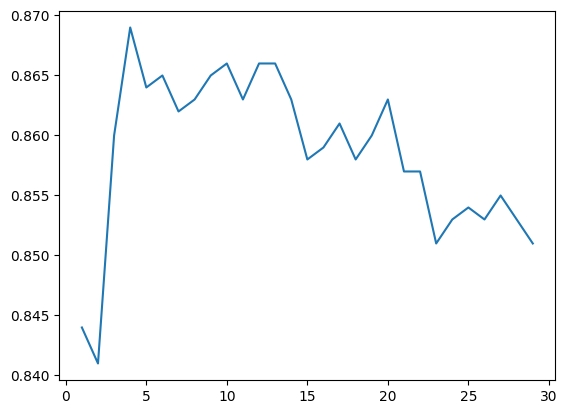

In [15]:
plt.plot(kVals, accuracies)

In [16]:
model.predict(valData[0:1,:])

array([8])

In [17]:
valData[0:1,:]

array([[  8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,  23, 105,  93,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0, 118,   0,  50, 113,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   5,   0,  75,  55,   0,   0, 101,  12,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0, 104,   4,   0,   0,  78,  31,
          0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  99,   0,   9,   0,
         99,  58,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  52,  95,   0,
         12,   0,  82,  89,   0,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [18]:
from sklearn.metrics import confusion_matrix